# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
from neurolib.utils.loadData import Dataset
from scipy.io import loadmat
from neurolib.utils.loadData import filterSubcortical

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [2]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

In [3]:
def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

In [4]:
C_data = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data = np.load(data_path+"/AvgDmatrixSCZ.npy")

In [5]:
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)

In [6]:
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)

In [7]:
FC_data = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries = np.load(data_path+"/AvgTmatrixSCZ.npy")

In [8]:
FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)

In [9]:
#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.55
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05

#wc.params['exc_ext'] = 0.45
#wc.params['c_excinh'] = 10.1
#wc.params['c_inhexc'] = 9.95
#wc.params['c_inhinh'] = 0
#wc.params['K_gl'] = 1.84
#wc.params['sigma_ou'] = 4.28e-05
total_gbc_model = []
total_scores_model = []
i_list = []

input = np.linspace(0, 2.5, 50) 

for i in range(len(input)): 
    wc = WCModel(Cmat = Cmat, Dmat = Dmat)
    wc.params['duration'] = 40*1000
    print(i)
    print(input[i])
    wc.params['exc_ext'] = 0.45
    wc.params['c_excinh'] = 10.33
    wc.params['c_inhexc'] = 9.67
    wc.params['c_inhinh'] = 0
    wc.params['K_gl'] = input[i]
    wc.params['sigma_ou'] = 4.28e-05
    wc.run(bold = True)
    gbc_model = np.mean(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]))
    total_gbc_model.append(gbc_model)
    print(gbc_model)
    scores = [func.matrix_correlation(func.fc(wc.BOLD.BOLD[:, wc.BOLD.t_BOLD>10000]), FCs)]
    total_scores_model.append(np.mean(scores))
    i_list.append(i)

0
0.0
0.998159202401244
1
0.05102040816326531
0.9981530123315291
2
0.10204081632653061
0.9981954896547375
3
0.15306122448979592
0.9980497172361076
4
0.20408163265306123
0.9980906939555788
5
0.25510204081632654
0.9980242979578773
6
0.30612244897959184
0.9978868060708826
7
0.35714285714285715
0.9979388258825779
8
0.40816326530612246
0.9978205549911963
9
0.45918367346938777
0.9979291045525381
10
0.5102040816326531
0.9978344969619541
11
0.5612244897959184
0.9978273574396124
12
0.6122448979591837
0.9980434549140582
13
0.6632653061224489
0.9977056977417638
14
0.7142857142857143
0.9975376107575263
15
0.7653061224489797
0.9974670273221511
16
0.8163265306122449
0.9971044055438182
17
0.8673469387755102
0.9971180439811675
18
0.9183673469387755
0.9969747067084032
19
0.9693877551020409
0.9970271648075263
20
1.0204081632653061
0.9971736400135736
21
1.0714285714285714
0.9659480384502243
22
1.1224489795918369
0.9427929149012388
23
1.1734693877551021
0.9448101471088828
24
1.2244897959183674
0.816309710

In [11]:
print(total_gbc_model)
print(total_scores_model)

[0.9992588753070569, 0.9992100125279667, 0.9991938827327792, 0.9991903655214601, 0.9991427578332945, 0.9991254196732119, 0.9990499300820903, 0.9990391811168111, 0.9988235726913284, 0.9989189645464197, 0.9987891130227442, 0.9988120950500218, 0.9981639477407532, 0.9979520132091839, 0.9451250732064633, 0.6249072828567749, 0.810083542720737, 0.6905635894633222, 0.7122553244728533, 0.8400588346104746, 0.9246383731076184, 0.7882764221391549, 0.7652448221875917, 0.8545384193719109, 0.8413110562807046, 0.897496087908591, 0.9070726371387501, 0.8898869371692393, 0.8784424073042874, 0.8486824745275129, 0.890757860507846, 0.8290248359421409, 0.7822308261395312, 0.7961780000764281, 0.8175765157309965, 0.8390500478867403, 0.9570750305867977, 0.9952196361331531, 0.9989479358274272, 0.9999957951159654, 0.9999975690040245, 0.9999982147187987, 0.9999982636254692, 0.9999986931583584, 0.9999986316407685, 0.9999988773201685, 0.9999989913349439, 0.9999991337676295, 0.9999991750079665, 0.9999991778398136]
[0

In [12]:
print(input)

[0.         0.03061224 0.06122449 0.09183673 0.12244898 0.15306122
 0.18367347 0.21428571 0.24489796 0.2755102  0.30612245 0.33673469
 0.36734694 0.39795918 0.42857143 0.45918367 0.48979592 0.52040816
 0.55102041 0.58163265 0.6122449  0.64285714 0.67346939 0.70408163
 0.73469388 0.76530612 0.79591837 0.82653061 0.85714286 0.8877551
 0.91836735 0.94897959 0.97959184 1.01020408 1.04081633 1.07142857
 1.10204082 1.13265306 1.16326531 1.19387755 1.2244898  1.25510204
 1.28571429 1.31632653 1.34693878 1.37755102 1.40816327 1.43877551
 1.46938776 1.5       ]


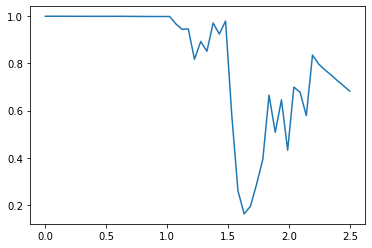

In [10]:
plt.plot(input, total_gbc_model)
plt.show()